In [66]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from datetime import datetime

In [ ]:
now =  datetime.now().strftime('%Y-%m-%d')
Apple = yf.download("AAPL", start= "2020-01-01", end= now)

In [ ]:
ticker=("SPY", "AAPL", "KO", "MSFT")
stocks = yf.download(ticker, start="2020-01-01", end=now)
stocks.to_csv("Stocks.csv")

In [ ]:
# The header serves to define multiple levels of column headers from the CSV file. 
stocks =  pd.read_csv("Stocks.csv", header=[0,1], index_col=[0], parse_dates=[0]) # index_col is used tio delet the first column in our example is colled the index.
stocks

In [ ]:
stocks.columns = stocks.columns.to_flat_index()
stocks.columns

In [ ]:
# Dans cette case l'objectif est d'avoir plusieur niveaux d'indexation.
stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)
stocks

In [ ]:
stocks.describe()

In [ ]:
# Stoker seulement la fermeture des actions dans la variable close.
close = stocks.loc[:,"Close"].copy()
close

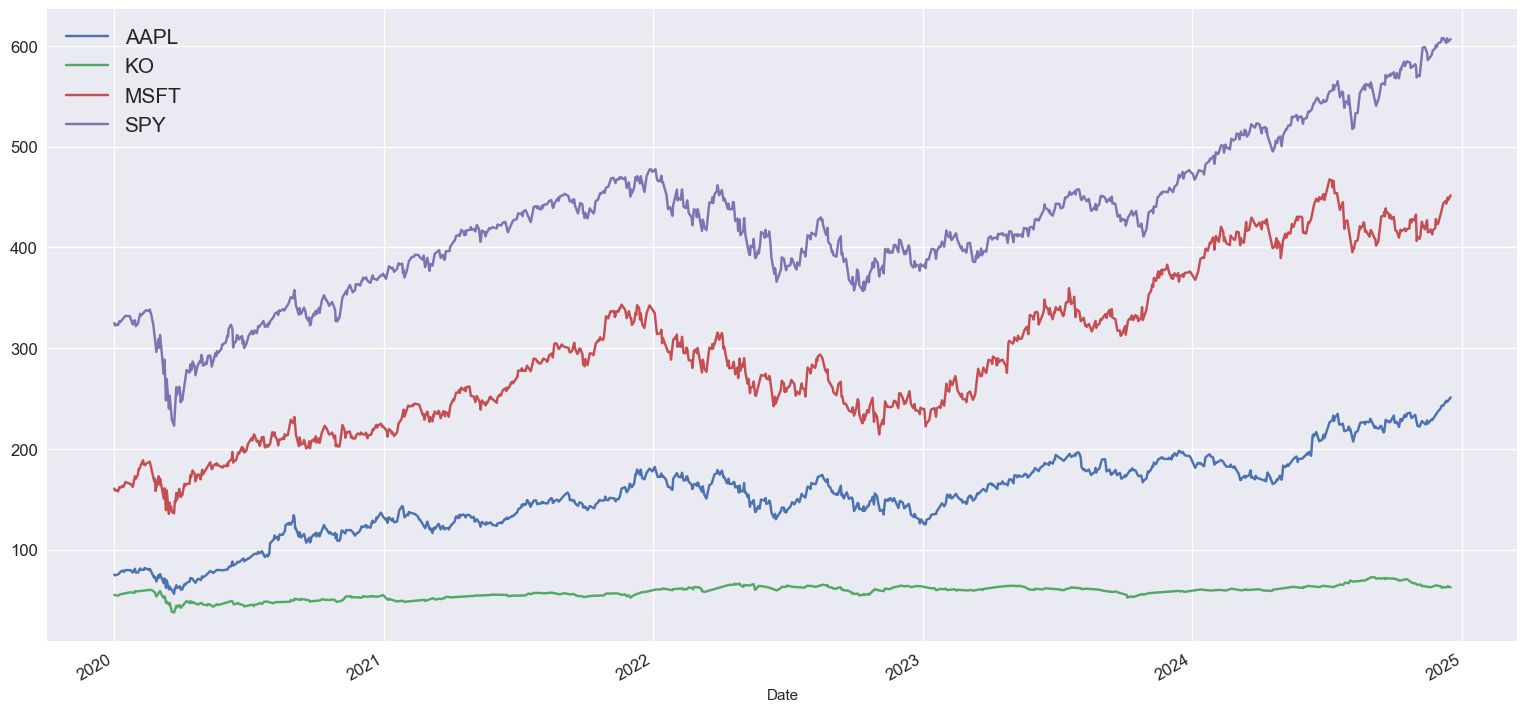

In [88]:
# Plot le graphe des actions notamment leurs prix de fermeture dans la bourse
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")


close.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=15)
plt.show()
